## Matrix 

In [5]:
import numpy as np
sold=np.array([[50,60,25],[10,13,5],[40,70,52]])
unit=np.array([20,30,15])
sales=np.dot(unit,sold)
sales

array([1900, 2640, 1430])

In [6]:
ex=np.array([75,75,75])
revenue=np.array([[200,220,250],[68,79,105],[110,140,180],[80,85,90]])
usd=ex*revenue
usd

array([[15000, 16500, 18750],
       [ 5100,  5925,  7875],
       [ 8250, 10500, 13500],
       [ 6000,  6375,  6750]])

In [7]:
usd2=75*revenue
usd2

array([[15000, 16500, 18750],
       [ 5100,  5925,  7875],
       [ 8250, 10500, 13500],
       [ 6000,  6375,  6750]])

## Mini batch gradient descent

In [85]:
import pandas as pd
import random
import numpy as np

In [86]:
df=pd.read_csv('homeprices_banglore.csv')
df.head(3)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00


In [87]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [88]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [89]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [90]:
#scaled_y.reshape(20,)

In [3]:
#np.random.permutation(20)

In [2]:
#for i in range(0,20,5):
    #print(i)


In [93]:
def minibatch_gd(X,y_true,epochs,batch_size=5,learning_rate=0.01):
    number_of_feature=X.shape[1]
    w=np.ones(shape=(number_of_feature))
    b=0
    total_samples=X.shape[0]

    if batch_size > total_samples:
        batch_size = total_samples
    
    cost_list=[]
    epoch_list=[]

    #num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):
        random_indices=np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]

            y_predicted = np.dot(w,Xj.T) + b
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
            cost = np.mean(np.square(yj-y_predicted))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = minibatch_gd(scaled_X,scaled_y.reshape(scaled_y.shape[0],),120,batch_size=5,learning_rate=0.01)
w,b,cost

(array([0.71018442, 0.67832563]), -0.23321616840144105, 0.0033094485902518097)

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

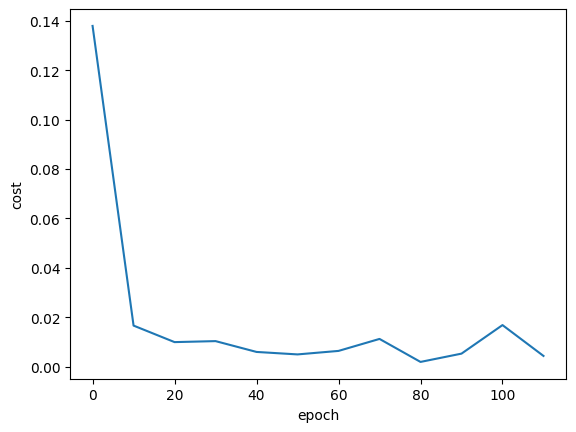

In [73]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [75]:
def predict(area,bedroom,w,b):
    scaled_X = sx.transform([[area,bedroom]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
predict(2000,2,w,b)

C:\Users\kimmy\miniforge3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


63.048195208250725

In [4]:
#r=np.random.permutation(20)
#scaled_X[r]
#r

In [5]:
#scaled_X[([1,2,3])]
